In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [12]:
#input dataset
data=pd.read_csv('./data/preprocess_dataset/dataset_2class_2descriptor.csv')

del data['Unnamed: 0']
x = data.iloc[:, :-1]
y = data.iloc[:, -1]
scaler = MinMaxScaler() 
X = scaler.fit_transform(x)

In [13]:
col = data.columns[:-1]
print(col)
X=pd.DataFrame(X,columns=col)
data=pd.concat([X,y],axis=1)

Index(['MoranAuto_Hydrophobicity1', 'MoranAuto_Hydrophobicity2',
       'MoranAuto_Hydrophobicity3', 'MoranAuto_Hydrophobicity4',
       'MoranAuto_Hydrophobicity5', 'MoranAuto_Hydrophobicity6',
       'MoranAuto_Hydrophobicity7', 'MoranAuto_Hydrophobicity8',
       'MoranAuto_Hydrophobicity9', 'MoranAuto_Hydrophobicity10',
       ...
       'SRW10', 'TSRW10', 'MW', 'AMW', 'WPath', 'WPol', 'Zagreb1', 'Zagreb2',
       'mZagreb1', 'mZagreb2'],
      dtype='object', length=1642)


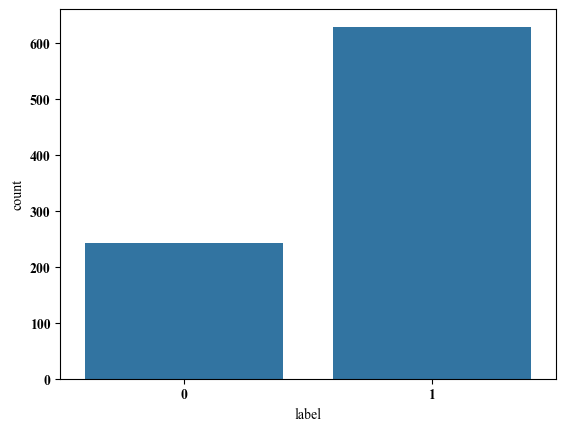

In [14]:
ax = sns.countplot(x='label',data=data)   

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [16]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=1000.0, gamma=0.1, random_state=0)
clf = clf.fit(X_train,y_train)

Confusion Matrix:
[[ 62  17]
 [ 11 172]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.82        79
           1       0.91      0.94      0.92       183

    accuracy                           0.89       262
   macro avg       0.88      0.86      0.87       262
weighted avg       0.89      0.89      0.89       262

Accuracy: 0.8931297709923665


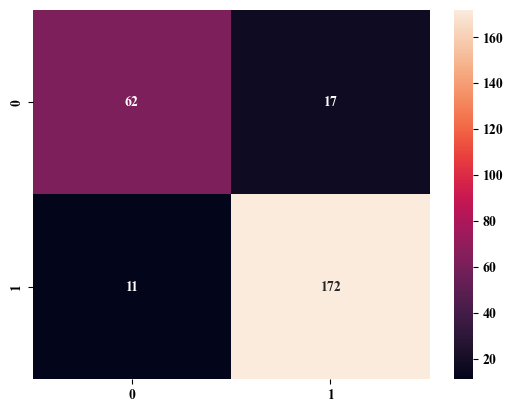

In [17]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 64  15]
 [ 12 171]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        79
           1       0.92      0.93      0.93       183

    accuracy                           0.90       262
   macro avg       0.88      0.87      0.88       262
weighted avg       0.90      0.90      0.90       262

Accuracy: 0.8969465648854962


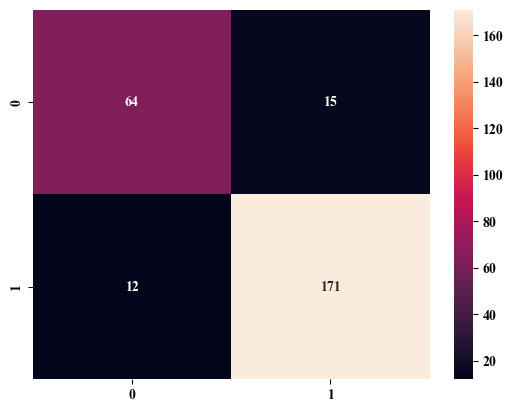

In [18]:
# RandomForest
forest = RandomForestClassifier(n_estimators = 10, random_state=0)      
forest = forest.fit(X_train,y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

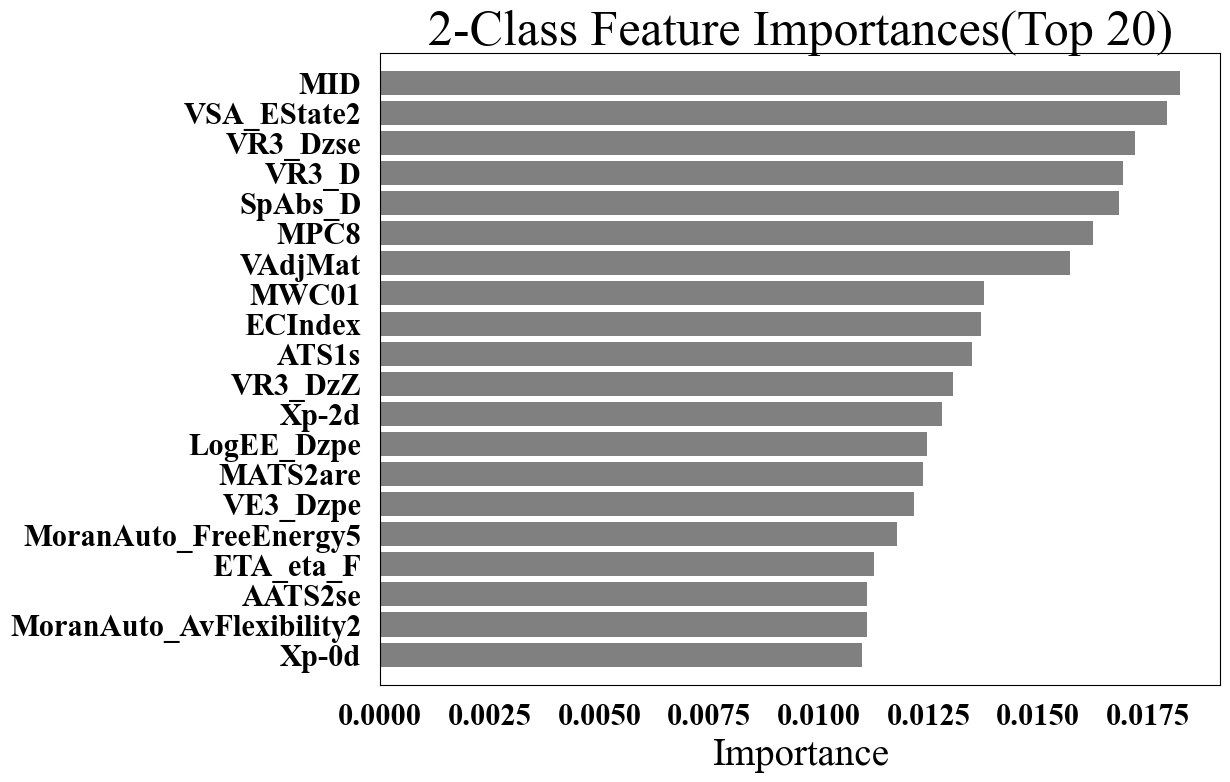

In [19]:
# feature importances
importances = forest.feature_importances_
plt.figure(figsize=(12, 8))

indices = importances.argsort()[::-1][:20]
plt.style.use('default')
plt.rcParams["font.weight"] = "bold"

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.xticks(size=22)
plt.yticks(size=22)


font1 = {'size' : 36,}
font2 = {'size' : 28,}
font3 = {'size' : 13,}


plt.title("2-Class Feature Importances(Top 20)",font1)


ax = plt.gca()
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad=10)
ax.yaxis.set_tick_params(pad=10)


plt.barh(range(len(indices)), importances[indices],color='gray')
plt.yticks(range(len(indices)), col[indices])
plt.ylim([-1, len(indices)])
plt.gca().invert_yaxis()

plt.xlabel('Importance',font2)
plt.gcf().subplots_adjust(left=0.2,top=0.91,bottom=0.12) 

# 6.save
#plt.savefig('importance.tif', dpi=300)
plt.show()


Confusion Matrix:
[[ 62  17]
 [ 12 171]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        79
           1       0.91      0.93      0.92       183

    accuracy                           0.89       262
   macro avg       0.87      0.86      0.87       262
weighted avg       0.89      0.89      0.89       262

Accuracy: 0.8893129770992366


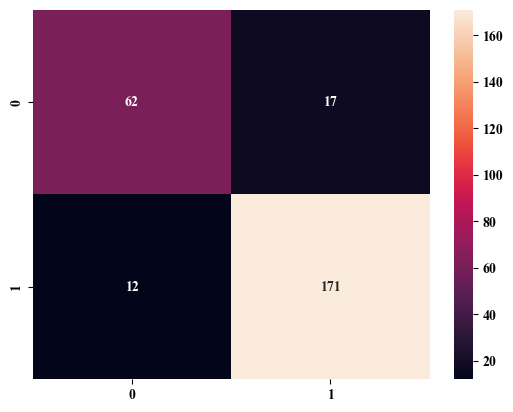

In [20]:
from xgboost import XGBClassifier

clf2 = XGBClassifier(
    max_depth=2,
    gamma=2,
    eta=0.8,
    reg_alpha=0.5,
    reg_lambda=0.5, random_state=0
)
clf2 = clf2.fit(X_train,y_train)
y_train_pred = clf2.predict(X_train)
y_test_pred = clf2.predict(X_test)


result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

MLP= MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(2000,50), random_state=0) 
MLP.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(2000, 50), random_state=0,
              solver='sgd')

Confusion Matrix:
[[  2  77]
 [  2 181]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.03      0.05        79
           1       0.70      0.99      0.82       183

    accuracy                           0.70       262
   macro avg       0.60      0.51      0.43       262
weighted avg       0.64      0.70      0.59       262

Accuracy: 0.6984732824427481


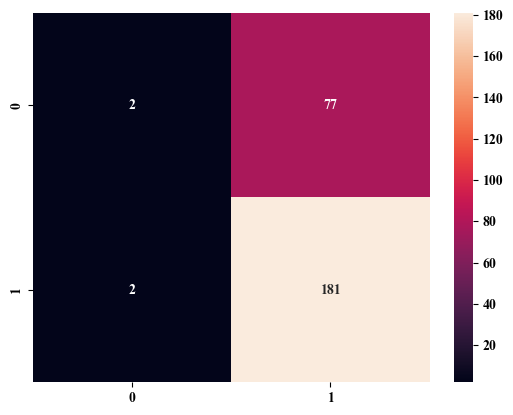

In [22]:
y_train_pred = MLP.predict(X_train)
y_test_pred = MLP.predict(X_test)

result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 64  15]
 [ 14 169]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        79
           1       0.92      0.92      0.92       183

    accuracy                           0.89       262
   macro avg       0.87      0.87      0.87       262
weighted avg       0.89      0.89      0.89       262

Accuracy: 0.8893129770992366


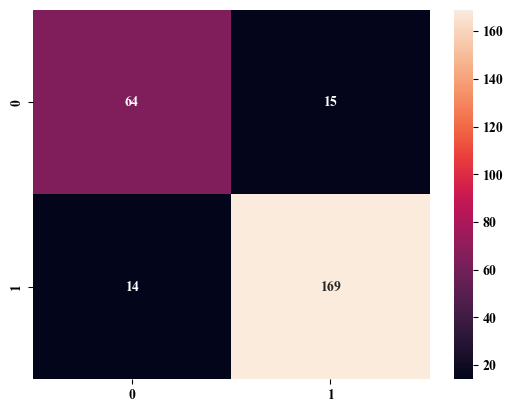

In [23]:
#GBDT
from sklearn.ensemble import GradientBoostingClassifier
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
         max_depth=1, random_state=0).fit(X_train, y_train)
y_train_pred = clf3.predict(X_train)
y_test_pred = clf3.predict(X_test)

result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

In [24]:
# select 20 features 
k_best = SelectKBest(chi2,k=20).fit(X_train, y_train)
#k_best

selected = k_best.get_support()
selected_features= [col[i] for i, s in enumerate(selected) if s]
scores = [k_best.scores_[i] for i, s in enumerate(selected) if s]

df = pd.DataFrame({'feature': selected_features, 'score': scores})
df = df.sort_values('score', ascending=False)

print(df)

                      feature      score
11                  BCUTpe-1l  13.730843
10                  BCUTse-1l  13.700081
12                 BCUTare-1l  13.669438
7                    BCUTd-1l  13.519231
8                    BCUTZ-1l  13.510089
9                    BCUTm-1l  13.436020
19                    MDEC-23   9.997433
0   GearyAuto_Hydrophobicity8   5.834140
18                GhoseFilter   5.503356
14                       NaaN   5.436732
15                       SaaN   5.243036
17                   Lipinski   4.769575
13                   BalabanJ   4.600907
2    GearyAuto_AvFlexibility9   4.473245
6           GearyAuto_Steric9   4.376986
4       GearyAuto_ResidueASA9   4.082387
5       GearyAuto_ResidueVol9   4.029011
1   GearyAuto_Hydrophobicity9   4.027205
3       GearyAuto_ResidueASA1   3.904439
16                       CIC5   3.894412


Accuracy is:  0.8282442748091603
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        79
           1       0.87      0.89      0.88       183

    accuracy                           0.83       262
   macro avg       0.80      0.79      0.79       262
weighted avg       0.83      0.83      0.83       262



<Axes: >

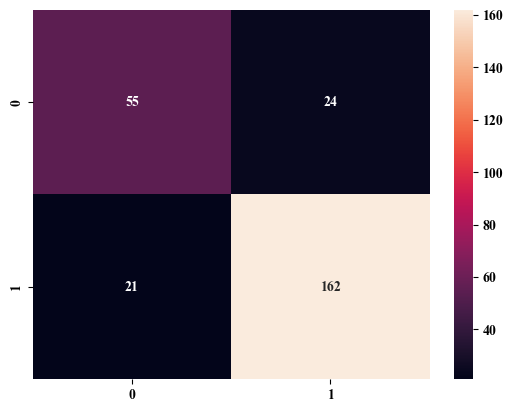

In [25]:
X_2_train=X_train[selected_features]
X_2_test=X_test[selected_features]


clf_rf_2 = RandomForestClassifier(n_estimators = 10, random_state=0)      
clr_rf_2 = clf_rf_2.fit(X_2_train,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(X_2_test))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(X_2_test))

#
result1 = classification_report(y_test, clf_rf_2.predict(X_2_test))
print("Classification Report:",)
print (result1)
sns.heatmap(cm_2,annot=True,fmt="d")

In [26]:
selected_features

['GearyAuto_Hydrophobicity8',
 'GearyAuto_Hydrophobicity9',
 'GearyAuto_AvFlexibility9',
 'GearyAuto_ResidueASA1',
 'GearyAuto_ResidueASA9',
 'GearyAuto_ResidueVol9',
 'GearyAuto_Steric9',
 'BCUTd-1l',
 'BCUTZ-1l',
 'BCUTm-1l',
 'BCUTse-1l',
 'BCUTpe-1l',
 'BCUTare-1l',
 'BalabanJ',
 'NaaN',
 'SaaN',
 'CIC5',
 'Lipinski',
 'GhoseFilter',
 'MDEC-23']

In [27]:
#rfe randomforest
from sklearn.feature_selection import RFE

clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=20, step=1)
rfe = rfe.fit(X_train, y_train)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        79
           1       0.94      0.97      0.96       183

    accuracy                           0.94       262
   macro avg       0.94      0.92      0.93       262
weighted avg       0.94      0.94      0.94       262

Accuracy: 0.9389312977099237


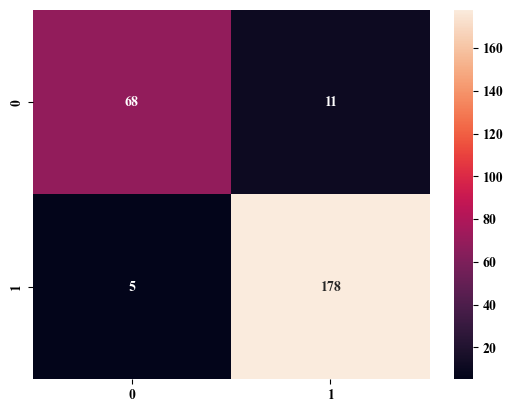

In [28]:
y_train_pred = rfe.predict(X_train)
y_test_pred = rfe.predict(X_test)

cm_2 = confusion_matrix(y_test,rfe.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")

result1 = classification_report(y_test, rfe.predict(X_test))
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,rfe.predict(X_test))
print("Accuracy:",result2)

In [29]:
#rfecv for randomforest
from sklearn.feature_selection import RFECV

clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5 cross valid
rfecv = rfecv.fit(X_train, y_train)


Confusion Matrix:
[[ 67  12]
 [  8 175]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        79
           1       0.94      0.96      0.95       183

    accuracy                           0.92       262
   macro avg       0.91      0.90      0.91       262
weighted avg       0.92      0.92      0.92       262

Accuracy: 0.9236641221374046


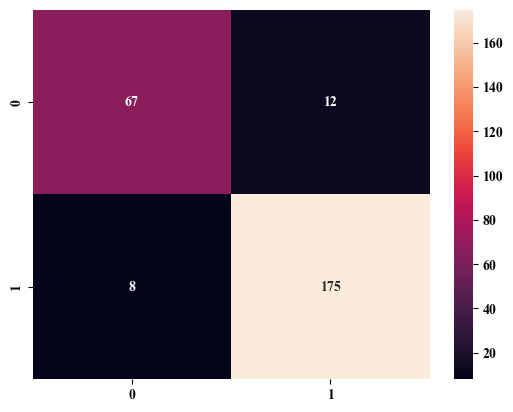

In [30]:
y_train_pred = rfecv.predict(X_train)
y_test_pred = rfecv.predict(X_test)

result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

In [31]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', pd.DataFrame(X_train).columns[rfecv.support_])

Optimal number of features : 147
Best features : Index(['MoranAuto_Hydrophobicity8', 'MoranAuto_AvFlexibility2',
       'MoranAuto_AvFlexibility3', 'MoranAuto_Polarizability3',
       'MoranAuto_Polarizability6', 'MoranAuto_Polarizability8',
       'MoranAuto_FreeEnergy4', 'MoranAuto_FreeEnergy6',
       'MoranAuto_ResidueASA3', 'MoranAuto_ResidueASA6',
       ...
       'AMID', 'AMID_h', 'AMID_C', 'MID_N', 'piPC8', 'SLogP', 'SMR', 'Vabc',
       'TMWC10', 'MW'],
      dtype='object', length=147)


In [32]:
rfecv.get_feature_names_out(col)

array(['MoranAuto_Hydrophobicity8', 'MoranAuto_AvFlexibility2',
       'MoranAuto_AvFlexibility3', 'MoranAuto_Polarizability3',
       'MoranAuto_Polarizability6', 'MoranAuto_Polarizability8',
       'MoranAuto_FreeEnergy4', 'MoranAuto_FreeEnergy6',
       'MoranAuto_ResidueASA3', 'MoranAuto_ResidueASA6',
       'MoranAuto_ResidueASA7', 'MoranAuto_ResidueVol3',
       'MoranAuto_ResidueVol7', 'MoranAuto_ResidueVol8',
       'MoranAuto_Steric3', 'MoranAuto_Steric6',
       'GearyAuto_Hydrophobicity8', 'GearyAuto_FreeEnergy1',
       'GearyAuto_Steric2', 'GearyAuto_Steric3', 'GearyAuto_Steric8',
       'LogEE_A', 'ATS4dv', 'ATS6dv', 'ATS1s', 'ATS3s', 'ATS0Z', 'ATS1Z',
       'ATS5Z', 'ATS0m', 'ATS5m', 'ATS0v', 'ATS1v', 'ATS2v', 'ATS0pe',
       'ATS0are', 'AATS6dv', 'AATS6d', 'AATS8d', 'AATS5se', 'AATS6pe',
       'AATS5are', 'AATS6are', 'ATSC5c', 'ATSC5dv', 'ATSC4d', 'ATSC1s',
       'ATSC5s', 'ATSC8s', 'ATSC0Z', 'ATSC1Z', 'ATSC2v', 'ATSC1pe',
       'ATSC5pe', 'ATSC6pe', 'ATSC1are', 'A

In [33]:
X_train_featureselect = X_train[col[rfecv.support_]]
X_test_featureselect = X_test[col[rfecv.support_]]

In [34]:
rfecv.cv_results_['mean_test_score']

array([0.9034253 , 0.90670399, 0.90671731, ..., 0.90670399, 0.90835666,
       0.91162202])

In [35]:
np.savetxt('rfecv_2class.txt',rfecv.cv_results_['mean_test_score'],fmt='%f',delimiter=',')

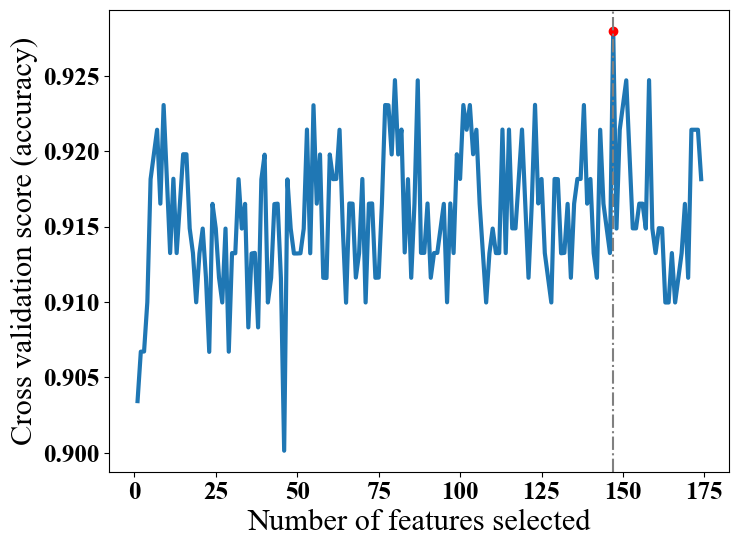

In [39]:
fig = plt.figure(figsize=(8, 6))
plt.xticks(fontproperties='Times New Roman', size=18)
plt.yticks(fontproperties='Times New Roman', size=18)
line_width = 3 
font2 = {'family' : 'Times New Roman','weight' : 'normal','size' : 22,}
font3 = {'family' : 'Times New Roman','weight' : 'normal','size' : 13,}
plt.xlabel("Number of features selected",font2)
plt.ylabel("Cross validation score (accuracy)",font2)
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) -1467), rfecv.cv_results_['mean_test_score'][:174], lw=line_width)

# max
x_max=147#This parameter needs to be changed based on the selection results
y_max=rfecv.cv_results_['mean_test_score'][146]
plt.plot(x_max,y_max, 'ro')
# save
plt.axvline(x=x_max, linestyle='-.', color='grey')
plt.savefig('rfecv.tif', dpi=300)
plt.show()

In [40]:
#ROC
from sklearn.metrics import roc_curve, auc

# forest ROC
y_score1 = forest.predict_proba(X_test)[:, 1] 
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_score1)
auc1 = auc(fpr1, tpr1)  # AUC
# GBDT ROC
y_score2 = clf3.predict_proba(X_test)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_score2)
auc2 = auc(fpr2, tpr2) 
# rfecv ROC
y_score3 = rfecv.predict_proba(X_test)[:, 1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_score3)
auc3 = auc(fpr3, tpr3) 
# rfe ROC
y_score4 = rfe.predict_proba(X_test)[:, 1]
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_score4)
auc4 = auc(fpr4, tpr4)  
# XBoost ROC
y_score5 = clf2.predict_proba(X_test)[:, 1]
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_score5)
auc5 = auc(fpr5, tpr5) 
# MLP ROC
y_score6 = MLP.predict_proba(X_test)[:, 1]
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_score6)
auc6 = auc(fpr6, tpr6) 

In [41]:
np.savetxt('auc1_x.txt',fpr1,fmt='%f',delimiter=',')
np.savetxt('auc1_y.txt',tpr1,fmt='%f',delimiter=',')
np.savetxt('auc2_x.txt',fpr2,fmt='%f',delimiter=',')
np.savetxt('auc2_y.txt',tpr2,fmt='%f',delimiter=',')
np.savetxt('auc3_x.txt',fpr3,fmt='%f',delimiter=',')
np.savetxt('auc3_y.txt',tpr3,fmt='%f',delimiter=',')
np.savetxt('auc4_x.txt',fpr4,fmt='%f',delimiter=',')
np.savetxt('auc4_y.txt',tpr4,fmt='%f',delimiter=',')
np.savetxt('auc5_x.txt',fpr5,fmt='%f',delimiter=',')
np.savetxt('auc5_y.txt',tpr5,fmt='%f',delimiter=',')
np.savetxt('auc6_x.txt',fpr6,fmt='%f',delimiter=',')
np.savetxt('auc6_y.txt',tpr6,fmt='%f',delimiter=',')

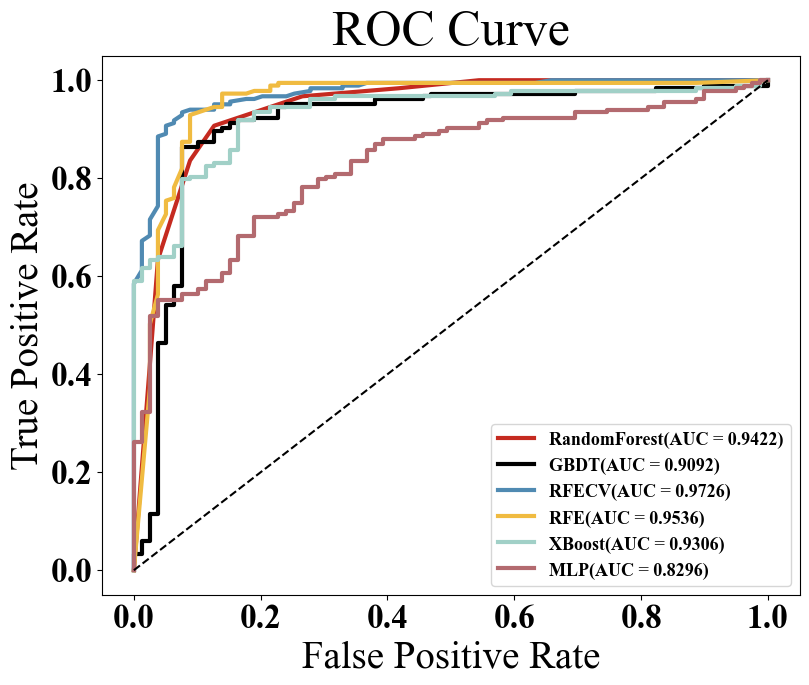

In [43]:
import matplotlib.pyplot as plt


import numpy as np
fig = plt.figure(figsize=(9, 7))
line_width = 3
plt.style.use('default') 

plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.xticks(size=24)
plt.yticks(size=24)

font1 = {'size' : 36,}
font2 = {'size' : 28,}
font3 = {'size' : 13,}
plt.title('ROC Curve',font1)
plt.plot(fpr1, tpr1, lw=line_width, label='RandomForest(AUC = %0.4f)' % auc1, color='#C52A20')
plt.plot(fpr2, tpr2, lw=line_width, label='GBDT(AUC = %0.4f)' % auc2, color='#000000')
plt.plot(fpr3, tpr3, lw=line_width, label='RFECV(AUC = %0.4f)' % auc3, color='#508AB2')
plt.plot(fpr4, tpr4, lw=line_width, label='RFE(AUC = %0.4f)' % auc4, color='#F0BB41')
plt.plot(fpr5, tpr5, lw=line_width, label='XBoost(AUC = %0.4f)' % auc5, color='#A1D0C7')
plt.plot(fpr6, tpr6, lw=line_width, label='MLP(AUC = %0.4f)' % auc6, color='#B36A6F')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right', prop=font3)
plt.xlabel('False Positive Rate',font2)
plt.ylabel('True Positive Rate',font2)
#save
plt.savefig('AUC_change.tif', dpi=300)
plt.show()

In [44]:
#AUPR
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

y_score1 = forest.predict_proba(X_test)[:, 1] 
fpr1, tpr1, thresholds1 = precision_recall_curve(y_test, y_score1)
auc1 = average_precision_score(y_test, y_score1) 

y_score2 = clf3.predict_proba(X_test)[:, 1]
fpr2, tpr2, thresholds2 = precision_recall_curve(y_test, y_score2)
auc2 = average_precision_score(y_test, y_score2) 


y_score3 = rfecv.predict_proba(X_test)[:, 1]
fpr3, tpr3, thresholds3 = precision_recall_curve(y_test, y_score3)
auc3 = average_precision_score(y_test, y_score3)
y_score4 = rfe.predict_proba(X_test)[:, 1]
fpr4, tpr4, thresholds4 = precision_recall_curve(y_test, y_score4)
auc4 = average_precision_score(y_test, y_score4)

y_score5 = clf2.predict_proba(X_test)[:, 1]
fpr5, tpr5, thresholds5 = precision_recall_curve(y_test, y_score5)
auc5 = average_precision_score(y_test, y_score5)

y_score6 = MLP.predict_proba(X_test)[:, 1]
fpr6, tpr6, thresholds6 = precision_recall_curve(y_test, y_score6)
auc6 = average_precision_score(y_test, y_score6)

In [45]:
np.savetxt('aupr1_x.txt',tpr1,fmt='%f',delimiter=',')
np.savetxt('aupr1_y.txt',fpr1,fmt='%f',delimiter=',')
np.savetxt('aupr2_x.txt',tpr2,fmt='%f',delimiter=',')
np.savetxt('aupr2_y.txt',fpr2,fmt='%f',delimiter=',')
np.savetxt('aupr3_x.txt',tpr3,fmt='%f',delimiter=',')
np.savetxt('aupr3_y.txt',fpr3,fmt='%f',delimiter=',')
np.savetxt('aupr4_x.txt',tpr4,fmt='%f',delimiter=',')
np.savetxt('aupr4_y.txt',fpr4,fmt='%f',delimiter=',')
np.savetxt('aupr5_x.txt',tpr5,fmt='%f',delimiter=',')
np.savetxt('aupr5_y.txt',fpr5,fmt='%f',delimiter=',')
np.savetxt('aupr6_x.txt',tpr6,fmt='%f',delimiter=',')
np.savetxt('aupr6_y.txt',fpr6,fmt='%f',delimiter=',')

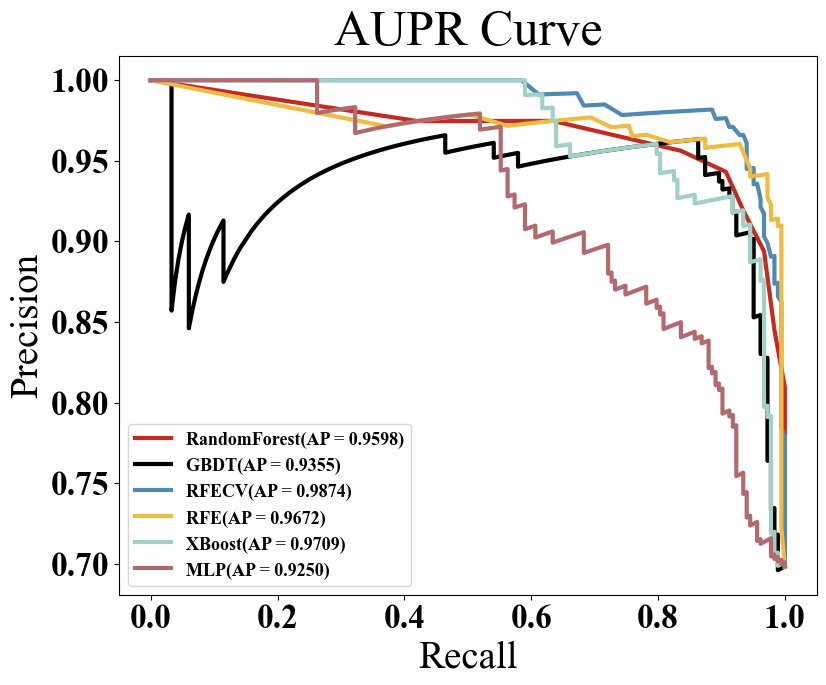

In [47]:
import matplotlib.pyplot as plt


import numpy as np
fig = plt.figure(figsize=(9, 7))
line_width = 3 
plt.style.use('default') 
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.xticks(size=24)
plt.yticks(size=24)

font1 = {'size' : 36,}
font2 = {'size' : 28,}
font3 = {'size' : 13,}
plt.title('AUPR Curve',font1)
plt.plot(tpr1, fpr1, lw=line_width, label='RandomForest(AP = %0.4f)' % auc1, color='#C52A20')
plt.plot(tpr2, fpr2, lw=line_width, label='GBDT(AP = %0.4f)' % auc2, color='#000000')
plt.plot(tpr3, fpr3, lw=line_width, label='RFECV(AP = %0.4f)' % auc3, color='#508AB2')
plt.plot(tpr4, fpr4, lw=line_width, label='RFE(AP = %0.4f)' % auc4, color='#F0BB41')
plt.plot(tpr5, fpr5, lw=line_width, label='XBoost(AP = %0.4f)' % auc5, color='#A1D0C7')
plt.plot(tpr6, fpr6, lw=line_width, label='MLP(AP = %0.4f)' % auc6, color='#B36A6F')

plt.legend(loc='lower left', prop=font3)
plt.xlabel('Recall',font2)
plt.ylabel('Precision',font2)
#save
plt.savefig('AUPR_change.tif', dpi=300)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
forest.fit(X_train, y_train)

gbdt_pred = clf3.predict(X_test)
xgb_pred = clf2.predict(X_test)
rf_pred = forest.predict(X_test)

ensemble_matrix = np.column_stack((gbdt_pred, xgb_pred, rf_pred))

lr_model = LogisticRegression()
lr_model.fit(ensemble_matrix, y_test)  


final_pred = lr_model.predict(ensemble_matrix)


accuracy = accuracy_score(y_test, final_pred)
print(f'Accuracy: {accuracy}')